# E-Liner Design

In dit notebook onderzoeken we enkele design aspecten van het Knutselba(a)r [E-Liner](http://knutselbaar.be/projecten/E-Liner) project.

We gaan op zoek hoe we de arm van ons tekenrobotje kunnen maken en hoe we kunnen berekenen hoe we deze moeten bedienen.

## Introductie

Dit project is geinspireerd door het [Line-us](https://www.kickstarter.com/projects/line-us/line-us-the-little-robot-drawing-arm) kickstarter project. Omdat het ontwerpen en bouwen van dit tekenrobotje verschillende interessante aspecten inhoud (meetkunde, mechanische constructie, programmeren,...) _en_ dat het niveau van elk van deze onderdelen bevattelijk is voor kinderen, leek het ons echt Knutselba(a)r project.

### Van tekenaap tot ruit en terug

Een [tekenaap](https://nl.wikipedia.org/wiki/Tekenaap) of pantograaf, of zelfs nog algemener een scharnierende opstelling zoals je die bv. kent van een [uittrekbare spiegel in de badkamer](https://en.wikipedia.org/wiki/Pantograph#Other_uses) vormt de basis van het ontwerp van de E-Liner.

![Telescopische arm](images/telescopische-arm.png)

Bij zo'n telescopische arm, kunnen we door de twee uiteinden naar elkaar toe te brengen, deze beweging omzetten in een voorwaartse beweging van het eindpunt. Dit principe kunnen we toepassen om een arm te maken voor onze tekenrobot.

Deze telescopische arm is opgebouwd uit aan elkaar geschakelde ruiten, die de beweging aan elkaar doorgeven. Wanneer we nu opmerken dat we de uiteinden kunnen weglaten en de beweging bekijken als het draaien van de eerste twee zijden van de eerste ruit, dan kunnen we ons voorstellen dat we deze twee armen kunnen bedienen met twee motoren, om zo vanuit één vast punt, een andere punt te laten bewegen.

Zo kunnen we allereerst de arm langer of korter maken. Dit doen we door de twee zijden over een zelfde hoek te laten draaien. Indien we echter één van de zijden meer of minder draaien dan de andere, zal de hele arm ook kunnen draaien.

![Telescopische rotatie](images/telescopische-rotatie.png)

In combinatie met het kunnen uitstrekken, kunnen we vanuit één punt met aleen maar twee draaibewegingen het uiteinde over een volledige oppervlakte bewegen. Die oppervlakte die de arm kan bereiken wordt dan natuurlijk ons tekenpapier.

![Bereik](images/bereik.png)

We kunnen deze arm nu vereenvoudigen tot één enkele [ruit](https://nl.wikipedia.org/wiki/Ruit_%28meetkunde%29), uit de meetkunde. Dus we zullen een beetje moeten gaan rekenen!

## Functies voor een ruit

> Het is niet super belangrijk dat je al dit wiskundige gebrabbel volledig begrijpt. Probeer gewoon alvast aan te voelen dat je met die soms saaie wiskunde heel coole dingen kan doen!

Als we het vrije hoekpunt, waar we onze stift gaan bevestigen, willen positioneren door het draaien van de twee overliggende zijden, willen we feitelijk weten onder welke hoek we deze zijden moeten plaatsen om op een bepaald punt `x`,`y` terecht te komen.

Een eerste berekening die we nodig hebben is het omzetten van `x` en `y` coordinaten naar deze hoeken voor een gegeven zijdelengte, `l`.

![Ruit Meetkunde](images/ruit-meetkunde.png)

`x` en `y` bepalen de volledige groene driehoek, want met de hulp van [Pythagoras](https://nl.wikipedia.org/wiki/Stelling_van_Pythagoras) kunnen we de lengte `L` bepalen van de diagonaal tussen het vaste punt en het punt `x`, `y`. Als we de drie lengtes van de zijden van een (rechthoekige) driehoek kennen, kunnen we ook de andere hoeken berekenen.

Driehoeksmeetkunde leert ons immers dat de [_cosinus_](https://nl.wikipedia.org/wiki/Sinus_en_cosinus) van de hoek tussen de schuine zijde en de (aan)liggende zijde gelijk is aan de lengte van deze (aan)liggende zijde, gedeeld door de lengte van de schuine zijde. Maar ook dat de [_tangens_](https://nl.wikipedia.org/wiki/Tangens_en_cotangens) van diezelfde hoek gelijk is aan de lengte van de overstaande zijde gedeeld door de lengte van de aanliggende zijde.

Dus voor de groene driehoek geldt dat `tan(a) = y/x` of, aangezien we `a` zoeken: `a = atan(y/x)`, waar `atan`, de _boogtangens_ het omgekeerde doet van de tangens, en ons dus de grootte van de hoek `a` oplevert.

Op dezelfde manier kunnen we nu de gele driehoek gebruiken om de hoek `b` te bepalen: `l` is de lengte van de schuine zijde en `L/2` is de lengte van de (aan)liggende zijde, `B` die we nodig hebben om de hoek `b` te bepalen.

In [105]:
import math

def bepaal_hoeken(x, y, l=10, x0=0, y0=0):
    if x-x0 == 0:
        a = math.pi/2
    else:
        a = math.atan((y-y0)/(x-x0))
    L = math.sqrt( math.pow(x-x0,2) + math.pow(y-y0,2) )
    B = L/2
    b = math.acos(B/l)
    if y < y0 or x < x0:
        a = a + math.pi
    return (a,b)

bepaal_hoeken(4,5)  # resultaat in radialen

(0.8960553845713439, 1.2449019531483363)

De hoeken `a` en `b` bepalen de hoeken waaronder we de armen moeten draaien en/of plaatsen. Voor de bovenste arm kunnen we `a` optellen bij `b` en voor de onderste, trekken we die er vanaf. En met dezelfde cosinus en sinus regels als eerder, kunnen we nu de twee overige hoepunten berekenen en kunnen we de volledige ruit gaan tekenen.

In [106]:
%matplotlib inline

In [107]:
import matplotlib.pyplot as plt
import numpy as np

In [108]:
def teken_ruit(x, y, l=10, x0=0, y0=0):
    (a,b) = bepaal_hoeken(x, y, l, x0, y0)
    x1 = math.cos(a+b)*l
    y1 = math.sin(a+b)*l
    x2 = math.cos(a-b)*l
    y2 = math.sin(a-b)*l
    plt.axis('equal')
    _ = plt.plot([x0,x1,x,x2,x0],[y0,y1,y,y2,y0])

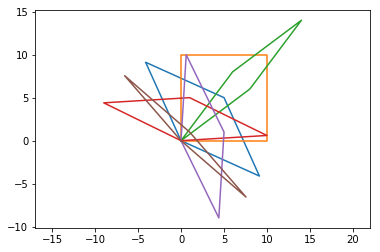

In [109]:
teken_ruit(5,5)     # blauw
teken_ruit(10,10)   # oranje
teken_ruit(14,14)   # groen
teken_ruit(1,5)     # rood
teken_ruit(5,1)     # paars
teken_ruit(1,1)     # bruin

### Het bereik

In de voorgaande tekening zien we dat de groene ruit ongeveer maximaal uitgestrekt is. Op papier kan de arm zich uitstrekken tot twee maal de lengte van een zijde van de ruit. Dan liggen alle armen twee aan twee op elkaar en in elkaar verlengde.

Aangezien we de arm ook kunnen laten ronddraaien, zal de arm dus een bereik hebben dat afgebakend wordt door een cirkel.

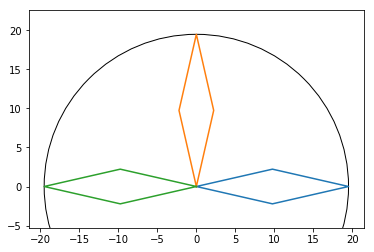

In [116]:
teken_ruit(19.5,0)
teken_ruit(0,19.5)
teken_ruit(-19.5,0)

cirkel = plt.Circle((0, 0), 19.5, color='black', fill=False)
_= plt.gcf().gca().add_artist(cirkel)

## Ruiten breken

Het idee van de ruit of zelfs de tekenaap start met een enkel punt waarin twee armen in een bepalde hoek worden geplaatst om zo een bepaald punt te bereiken. Naar constructie van onze teken robot is dat niet ect handig. We willen immers servo motoren gebruiken om de armen te bewegen en twee motoren op de zelfde plek is niet echt mogelijk. Een optie is om de twee motoren boven elkaar te plaatsen, de bovenste ondersteboven. Maar zou het niet handig zijn als ze gewoon naast elkaar zouden staan?

### Hoek splitsen

Stel dat we de twee armen die starten in de enkele oorsprong, een beetje uit elkaar trekken, maar er wel voor zorgen dat het resulterende eind-punt behouden blijft:

![Dubbele oorsprong](images/dubbele-oorsprong.png)

De twee licht grijze rechthoeken zouden twee servo motoren kunnen zijn en mits andere hoeken, zouden we het zelfde punt kunnen bereiken. Maar wat betekent dit voor onze brekeningen en wat zijn eventueel de gevolgen, bvb. voor het bereik. In feite verandert er weinig, alleen moeten we de meeste berekeningen dubbel doen:

![Dubbele oorsprong meetkunde](images/dubbele-oorsprong-meetkunde.png)

In feite blijft voor hoeken `a` en `b` alles het zelfde, maar met die hoeken leveren nu nog slechts de hoek voor 1 arm op. Voor de tweede arm moeten we alles opnieuw berekenen, gelukkig op nagenoeg dezelfde manier.

> We gaan vanaf nu er vanuit dat de twee oorsprongen op een zelfde afstand liggen van het nulpunt van de 2 dimensionale ruimte. De afstand tussen de twee oorsprongen noemen we `d` en de coordinaten van de oorsprongen worden dan `(-d/2, 0)` en `(d/2, 0)`. Dit komt overeen met de tekening hierboven, waar de twee oorsprongen op een zelfde afstand van de initiële oorsprong in het hoekpunt van de ruit.
> De functie `bepaal_hoeken` geeft vanaf nu tevens niet meer de hoeken `a` en `b` terug, maar de effectieve hoeken die de twee armen in de twee oorsprongen aan moeten nemen om het punt `(x,y)` te bereiken.

In [111]:
def bepaal_dubbele_hoeken(x, y, l=10, d=4):
    (a,b) = bepaal_hoeken(x, y, l, -d/2, 0)
    hoek1 = a+b
    (a,b) = bepaal_hoeken(x, y, l,  d/2, 0)
    hoek2 = a-b

    return (hoek1,hoek2)

bepaal_dubbele_hoeken(10,10)  # resultaat in radialen

(1.3692292043457543, 0.02016399555062176)

Met deze functie kunnen we de benodigde hoeken bepalen, en kunnen we de hele constructie opnieuw tekenen:

In [112]:
def teken_armen(x, y, l=10, d=4):
    (hoek1, hoek2) = bepaal_dubbele_hoeken(x, y, l, d)
    x1 = math.cos(hoek1)*l - d/2
    y1 = math.sin(hoek1)*l
    x2 = math.cos(hoek2)*l + d/2
    y2 = math.sin(hoek2)*l
    plt.axis('equal')
    _ = plt.plot([-d/2,x1,x,x2,d/2],[0,y1,y,y2,0])

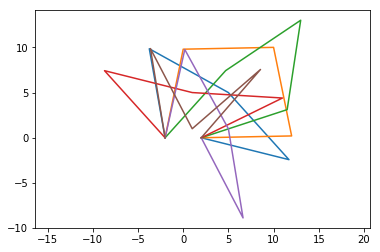

In [113]:
teken_armen(5,5)     # blauw
teken_armen(10,10)   # oranje
teken_armen(13,13)   # groen
teken_armen(1,5)     # rood
teken_armen(5,1)     # paars
teken_armen(1,1)     # bruin

Uit dit voorbeeld merken we reeds dat het bereik verkleind is. Het punt `(14,14)` is niet meer bereikbaar, omdat de linkerarm met oorsprong `(-2,0)` nu een stuk verderaf ligt. We zien dit ook op de "realistisch" haalbare cirkel die deze arm-combinatie kan bereiken:

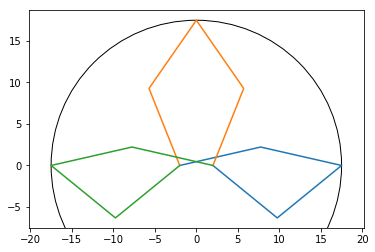

In [115]:
teken_armen(17.5,0)
teken_armen(0,17.5)
teken_armen(-17.5,0)
teken_armen(0,-17.5)

cirkel = plt.Circle((0, 0), 17.5, color='black', fill=False)
_= plt.gcf().gca().add_artist(cirkel)

## Een zijdelingse arm

Line-Us gebruikt nog een andere opstelling en voegt een bijkomend armsegment toe, waardoor de constructie in essentie niet voor zicht tekent, maar naast zich. Waarom zouden zij voor deze opstelling gekozen hebben?

![Zijdelingse arm](images/zijdelingse-arm.png)

Als we kijken naar de opstelling en in functie van ruiten en hoeken denken, merken we op dat er feitelijk twee ruiten zijn. Enerzijds is er de ruit die in bovenstaande opstellingen zorgde voor het tekenpunt, anderzijds kunnen we ook een ruit beschouwen die 90 graden naar rechts is gedraaid.

Dus stel dat we onze hogebeschreven opstelling 90 graden naar rechtdraaien, kunnen we voor het zelfde tekenpunt nu de hoeken van de armen bepalen. Echter, dit zijn niet de hoeken van de armen in de normale opstelling, maar wel die van dezelfde ruit die 90 graden gedraaid is.

![Gerelateerde ruiten](images/gerelateerde-ruiten.png)

De hoeken van een ruit zijn twee aan twee gelijk, en dus is de som van de twee verschillende hoeken is steeds gelijk aan 180 graden. Dit zien we op verschillende plekken terugkomen. Zo zien we bv. dat `h2`, de hoek van de rechtse arm van de virtuele ruit, in een directe relatie staat tot `h'1`, de hoek van de linkse echte oorsprongarm. Gelijkaardig zien we dat `h1`, de hoek van de links arm van de virtuele ruit, in directe relatie staat tot `h'2`.

We kunnen concluderen dat we de berekening van hoeken `h1` en `h2` kunnen doen met een opstelling die 90 graden naar rechts gedraaid is, en vervolgens die hoeken omrekenen tot de hoeken van de normale opstelling.

> Als we onze opstelling 90 graden naar rechts bewegen, is dit het zelfde als we het beoogde tekenpunt 90 graden naar links, of anders gezegd _tegen wijzerzin_, draaien. Om het punt `x,y` 90 graden tegen wijzer in te draaien, volstaat het om het punt `-

## En op een dag vind je...

... de [Plot Clock](http://www.thingiverse.com/thing:248009).

Bij het zoeken naar technische tekeningen van een servo motor, vond ik dan op een onverwacht moment de _voorouder_ van de Line-Us: de plot clock :-)

De opstelling van de plot clock lijkt zeer sterk op deze van de gebroken ruit waar we hier boven op uit kwamen en bevestigt dat dit alvast een goede piste is om verder te bekijken. De plot clock biedt tevens nog twee ideeën voor de nog overblijvende mechanische problemen die we moeten oplossen: het bevestigen van de stift en een mechanisme om de stift op te tillen van het schrijf oppervlak. Daarnaast biedt de plot clock ook nog een mogelijke oplossing om te werken met een herbruikbaar schrijfoppervlak, in de vorm van een "wisser".

## Bevestiging stift

De bevestiging van de stift op één voorarm, zoals bij de plot clock heeft één groot nadeel: afhankelijk van de stand van de armen, draait de stift een beetje tov het hoekpunt van de voorarmen. Idealiter zou de stift steeds op de loodlijn van dit punt naar het centrale punt tussen de twee oorsprongpunten liggen.

### Optie 1: Zelf-balancerend stift

Een eerste mogelijkheid ligt in de introductie van een extra arm en twee elastiekjes:

![Bevestiging stift](images/bevestiging-stift.png)

Door op de hoek gevorm door de voorarmen, een extra (draaiend) plaatje te bevestigen, en de uiteinde van dit plaatje met de central oorsprong te verbinden met de elastiekjes, creëren we een gelijkbenige driehoek die er voor zorgt dat het extra plaatje altijd loodrecht staat op de loodlijn vanuit de oorsprong en zo dus ook de stift steeds in dezelfde positie plaatst.

Op deze manier moeten we geen speciale rekening houden met de positie van de stift tov de voorarmen en is dit steeds een vaste verschuiving in de lijn van de loodlijn uit de oorsprong.

Het nadeel van deze opstelling is extra onderdelen en elastiekjes.

### Optie 2: Line-Us aanpak

De zijdelingse opstelling van de Line-Us lost dit probleem op door de zijdelingse arm. Deze heeft een eindpunt waar de stift eenvoudig centraal op gemonteerd kan worden.

### Optie 3: Stift als scharnier

Een derde optie is om de stift zelf als scharnier te gebruiken, of toch alvast als hengsel van het schanier. Door in de beide voorarmen een opening voor de stift te voorzien en deze beide over de stift te monteren, kan de stift als middelpunt van het tekenpunt opgebouwd worden. Één van deze armen moet dan gekozen worden om met een vijs de stift vast te zetten, in de andere arm zal de stift dan draaien.

![Scharnierende stift](images/scharnierende-stift.png)
